# Imports

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
# Apply the default theme
sns.set_theme()
sns.set(font_scale = 2.5)

plt.rcParams['lines.linewidth'] = 2
DPI = 200

# Arguments

In [2]:
from dataclasses import dataclass

@dataclass
class args:
    outputPath = '../results/cleaned target/total_target_cleaned_scaled'
    figPath = os.path.join(outputPath, 'figures')
    train_loss_filePath = os.path.join(outputPath, 'run-version_0-tag-train_loss_epoch.csv')
    val_loss_filePath = os.path.join(outputPath, 'run-version_0-tag-val_loss.csv')

# Utils

In [3]:
# from matplotlib.ticker import StrMethodFormatter, ScalarFormatter

# # https://stackoverflow.com/questions/42656139/set-scientific-notation-with-fixed-exponent-and-significant-digits-for-multiple
# class OOMFormatter(ScalarFormatter):
#     def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
#         self.oom = order
#         self.fformat = fformat
#         super().__init__(useOffset=offset,useMathText=mathText)

#     def _set_order_of_magnitude(self):
#         self.orderOfMagnitude = self.oom

#     def _set_format(self):
#         self.format = self.fformat
#         if self._useMathText:
#             self.format = r'$\mathdefault{%s}$' % self.format

In [4]:
def plot_loss(
    df, figsize=(14,8), title:str=None, figure_name:str=None, 
    base=5, annotate=True, multiplier=1e5
):
    df['Epoch'] = df['Step'] / df['Step'].min()
    df['Epoch'] = df['Epoch'].astype(int)
    df['Value'] *= multiplier

    fig, ax = plt.subplots(figsize=figsize)

    # formatter= OOMFormatter(-5)
    # # formatter = StrMethodFormatter('{x:2.2e}')
    # plt.gca().yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=base))

    plt.plot(df['Epoch'], df['Value'])
    plt.xlabel('Number of epochs')
    plt.ylabel(f'Mean Squared Error (× {1/multiplier})')
    # plt.ylim(bottom=df['Value'].min())
    plt.xlim(df['Epoch'].min()-1, df['Epoch'].max()+1)
    if title is not None:
        plt.title(title)

    minimum_loss = df['Value'].min()
    epoch = df[df['Value']==minimum_loss]['Epoch'].values[0]

    if annotate:
        arrowprops = dict(arrowstyle="fancy, head_length=0.8, head_width=0.5, tail_width=0.2", color='red')

        plt.annotate(f'Minimum point ({epoch}, {minimum_loss/multiplier:2.2e})', 
            xy=(epoch, minimum_loss),
            xytext=(max((6-epoch)*20, 0), 180), 
            textcoords='offset points',
            size=25, 
            ha='center', va="center",
            arrowprops=arrowprops
        )

    plt.tight_layout()
    if figure_name is not None:
        plt.savefig(figure_name, dpi=DPI)
    plt.show()

#  Plotting

## Train

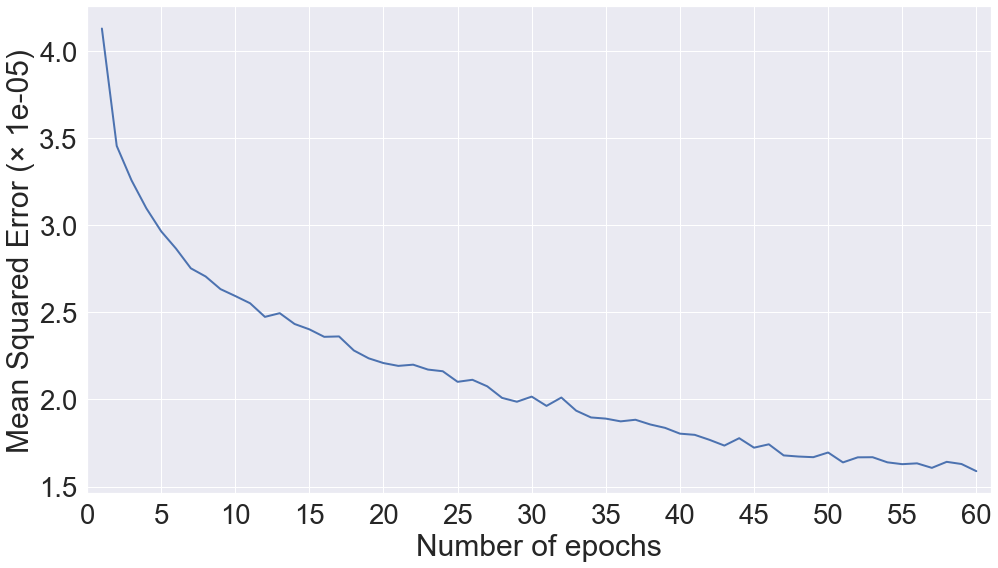

In [5]:
df = pd.read_csv(args.train_loss_filePath)
plot_loss(df, figure_name=os.path.join(args.outputPath, 'train_loss.jpg'), annotate=False)

## Validation

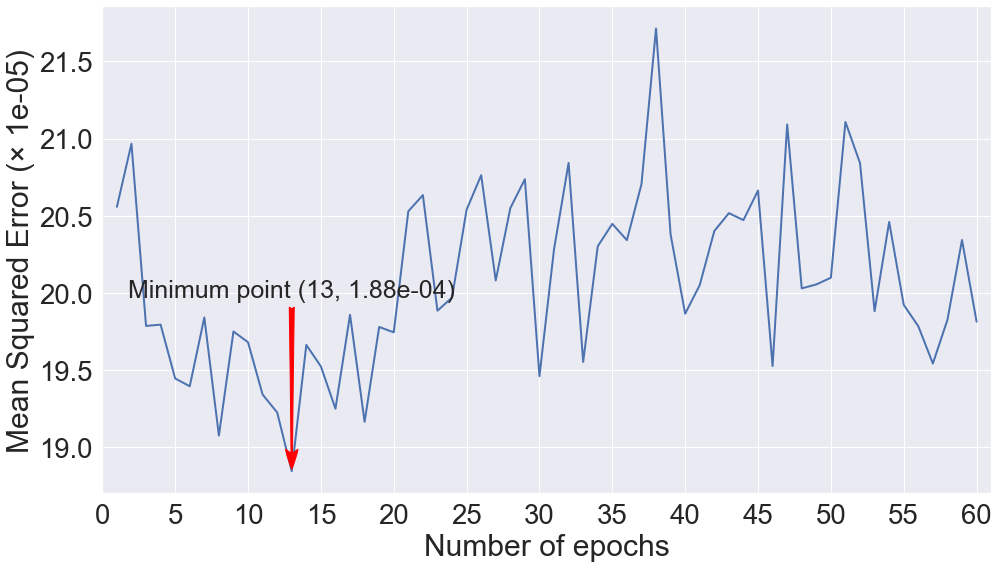

In [6]:
df = pd.read_csv(args.val_loss_filePath)
plot_loss(df, figure_name=os.path.join(args.outputPath, 'validation_loss.jpg'))